In [80]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import operator

In [81]:
alpha = 5
nPop = 100
Flow = [[0, 0, 2, 1, 0, 4, 3, 0, 0, 5],
[0, 0, 3, 0, 2, 2, 8, 0, 10, 0],
[2, 3, 0, 0, 0, 6, 3, 0, 5, 0],
[1, 0, 0, 0, 7, 1, 0, 5, 0, 0],
[0, 2, 0, 7, 0, 0, 0, 0, 0, 0],
[4, 2, 6, 1, 0, 0, 0, 0, 0, 1],
[3, 8, 3, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 5, 0, 0, 1, 0, 3, 0],
[0, 10, 5, 0, 0, 0, 0, 3, 0, 0],
[5, 0, 0, 0, 0, 1, 0, 0, 0, 0]]

In [82]:
def ini_pop(populationsize):
	init_pop = []
	Area = np.random.uniform(5, 15, len(Flow)) # section 4.2.3
	ratioareatoflow = [Area[j] / (sum(Flow[j][i] for i in range(len(Flow[0])))) for j in range(len(Flow))]
	AspectRatios = np.random.uniform(0.176, 5.664, len(Flow))
	for k in range(populationsize):
		intisequence = np.argsort(ratioareatoflow) + 1
		initRCL = [intisequence[j] for j in range(alpha)]
		placed = random.choice(initRCL)
		sequence = []
		IncresingRiFlow = []
		sequence.append(placed)
		for j in range(len(Flow) - 1):
			flowfacility = np.nonzero(Flow[placed - 1])[0] + 1
			flowfrmfacility = list(set(flowfacility) - set(sequence))
			if len(flowfrmfacility) > 0:
				for i in range(len(intisequence)):
					if intisequence[i] in flowfrmfacility:
						IncresingRiFlow.append(intisequence[i])	
			else:
				unplaced = list(set(intisequence) - set(sequence))
				for i in range(len(intisequence)):
					if intisequence[i] in unplaced:
						IncresingRiFlow.append(intisequence[i])
			if len(IncresingRiFlow) > alpha:
				RCL = [IncresingRiFlow[j] for j in range(alpha)]
			else:
				RCL = IncresingRiFlow
			placed = random.choice(RCL)
			sequence.append(placed)
			IncresingRiFlow.clear()
		init_pop.append(sequence)
	return init_pop, Area, ratioareatoflow, AspectRatios

In [83]:
def construct(pop, Area, ratioareatoflow, AspectRatios, GC = 0, QGA = 0):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111, aspect='equal')
    all_coordinates = []
    z_values = []
    for row in range(len(pop)):
        total_z = 0
        chromosome = pop[row]
        #print(chromosome)
        EMSlist = []
        coordinates_set = []
        w = math.sqrt(AspectRatios[chromosome[0] - 1] * Area[chromosome[0] - 1])
        h = math.sqrt(Area[chromosome[0] - 1] / AspectRatios[chromosome[0] - 1])
        coordinates_set.append([w / 2, h / 2])
        if QGA == 0:
            EMSlist.append([w, -math.inf, math.inf, math.inf])
            EMSlist.append([-math.inf, -math.inf, math.inf, 0])
            EMSlist.append([-math.inf, -math.inf, 0, math.inf])
            EMSlist.append([-math.inf, h, math.inf, math.inf])
        elif QGA == 1:
            EMSlist.append([-math.inf, -math.inf, 0, 0])
            EMSlist.append([-math.inf, 0, 0, math.inf])
            EMSlist.append([0, -math.inf, math.inf, 0])
            EMSlist.append([w, 0, math.inf, math.inf])
            EMSlist.append([0, h, math.inf, math.inf])
        for i in range(1, len(chromosome)):
            x_mean = 0
            y_mean = 0
            total_flow = 0
            for j in range(i):
                x_mean += (Flow[chromosome[i] - 1][chromosome[j] - 1] * coordinates_set[j][0])
                y_mean += ((Flow[chromosome[i] - 1][chromosome[j] - 1] * coordinates_set[j][1]))
                total_flow += Flow[chromosome[i] - 1][chromosome[j] - 1]
            if total_flow != 0:
                x_mean /= total_flow
                y_mean /= total_flow
            #print(x_mean, y_mean)
            
            w = math.sqrt(AspectRatios[chromosome[i] - 1] * Area[chromosome[i] - 1])
            h = math.sqrt(Area[chromosome[i] - 1] / AspectRatios[chromosome[i] - 1])
            #print(w, h)
            new_coordinates = []
            
            for EMS in EMSlist:
                if (EMS[2] - EMS[0] < w or EMS[3] - EMS[1] < h):
                    new_coordinates.append([-math.inf, -math.inf])
                    continue
                else:
                    if (x_mean < EMS[0]):
                        x = EMS[0] + w / 2
                    elif (x_mean > EMS[2]):
                        x = EMS[2] - w / 2
                    elif (x_mean - EMS[0] >= w / 2 and EMS[2] - x_mean >= w / 2):
                        x = x_mean
                    elif (x_mean - EMS[0] > EMS[2] - x_mean):
                        x = EMS[2] - w / 2
                    else:
                        x = EMS[0] + w / 2
                    
                    if (y_mean < EMS[1]):
                        y = EMS[1] + h / 2
                    elif (y_mean > EMS[3]):
                        y = EMS[3] - h / 2
                    elif (y_mean - EMS[1] >= h / 2 and EMS[3] - y_mean >= h / 2):
                        y = y_mean
                    elif (y_mean - EMS[1] > EMS[3] - y_mean):
                        y = EMS[3] - h / 2
                    else:
                        y = EMS[1] + h / 2
                    
                    new_coordinates.append([x, y])
            #print(new_coordinates)
            #break
            min_z = math.inf
            min_coord = new_coordinates[0]
            for new_coordinate in new_coordinates:
                z = 0
                for j in range(i):
                    distance = math.sqrt(((coordinates_set[j][0] - new_coordinate[0]) ** 2) + ((coordinates_set[j][1] - new_coordinate[1]) ** 2))
                    z += distance * Flow[chromosome[j] - 1][chromosome[i] - 1]
                if GC != 0:
                    z1 = 0
                    distanceToOrigin = math.sqrt(new_coordinate[0] ** 2 + new_coordinate[1] ** 2)
                    for j in range(i):
                        z1 += Flow[chromosome[j] - 1][chromosome[i] - 1]
                    z1 *= distanceToOrigin
                    z1 = z1 * (len(chromosome) - i - 1) / (len(chromosome) - 1)
                    z *= (1 - (len(chromosome) - i - 1) / (len(chromosome) - 1))
                    z += z1

                if z < min_z:
                    min_z = z
                    min_coord = new_coordinate
            total_z += min_z
            #print(min_z, min_coord, distance)
            coordinates_set.append(min_coord)
            toAddEMSlist = []
            toRemoveEMSlist = []
            for k in range(len(EMSlist)):
                EMS = EMSlist[k]
                if min_coord[0] + w / 2 < EMS[0] or min_coord[0] - w / 2 > EMS[2] or min_coord[1] + h / 2 < EMS[1] or min_coord[1] - h / 2 > EMS[3]:
                    continue
                else:
                    if (min_coord[0] + w / 2 < EMS[2]):
                        toAddEMSlist.append([min_coord[0] + w / 2, EMS[1], EMS[2], EMS[3]])
                    if (min_coord[0] - w / 2 > EMS[0]):
                        toAddEMSlist.append([EMS[0], EMS[1], min_coord[0] - w / 2, EMS[3]])
                    if (min_coord[1] - h / 2 > EMS[1]):
                        toAddEMSlist.append([EMS[0], EMS[1], EMS[2], min_coord[1] - h / 2])
                    if (min_coord[1] + h / 2 < EMS[3]):
                        toAddEMSlist.append([EMS[0], min_coord[1] + h / 2, EMS[2], EMS[3]])
                    toRemoveEMSlist.append(k)
            
            i = 0
            for remove in toRemoveEMSlist:
                del EMSlist[remove - i]
                i += 1
            for newEMS in toAddEMSlist:
                EMSlist.append(newEMS)
            #break
        z_values.append(total_z)
        all_coordinates.append(coordinates_set)
        
        #break
    #print(z_values)
    minpos = z_values.index(min(z_values))
    #print(all_coordinates[minpos])
    chromosome = pop[minpos]
    minx = math.inf
    miny = math.inf
    maxx = -math.inf
    maxy = -math.inf
    for i in range(len(chromosome)):
        w = math.sqrt(AspectRatios[chromosome[i] - 1] * Area[chromosome[i] - 1])
        h = math.sqrt(Area[chromosome[i] - 1] / AspectRatios[chromosome[i] - 1])
        x = all_coordinates[minpos][i][0]
        y = all_coordinates[minpos][i][1]
        ax1.add_patch(patches.Rectangle((x - w / 2, y - h / 2), w, h, facecolor = "gray", edgecolor = "black"))
        ax1.annotate(str(chromosome[i]), xy = (x, y), fontsize = 10)
        if minx > x:
            minx = x
        if maxx < x:
            maxx = x
        if miny > y:
            miny = y
        if maxy < y:
            maxy = y
    plt.ylim(miny - 5, maxy + 5)
    plt.xlim(minx - 5, maxx + 5)
    plt.show()
    
    return z_values

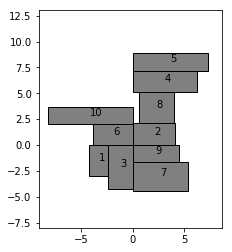

In [84]:
if __name__ == "__main__":
	pop = ini_pop(nPop)[0]
if __name__ == "__main__":
    returned = ini_pop(nPop)
    pop = returned[0]
    #print(pop)
    Area = returned[1]
    ratioareatoflow = returned[2]
    AspectRatios = returned[3]
    GC = 1
    QGA = 1
    z_values = construct(pop, Area, ratioareatoflow, AspectRatios, GC, QGA)

In [85]:
len(z_values)

100

In [86]:
minpos = z_values.index(min(z_values))
len(all_coordinates[minpos])

10

In [87]:
def crossover(p1,p2):
    parent = random.randint(0,1)
    N_inherit = random.randint(0,9)
    fixed = list(random.sample(range(1, 10), N_inherit))
    child = []
    index = list(np.array([0,1,2,3,4,5,6,7,8,9]))
    ele_inserted = []
    count = 0
    if(parent == 0):
        parent = p1
        other = p2
    else:
        parent = p2
        other = p1
    for i in fixed:
        ele_inserted.append(parent[i])
    for i in range (0,10):
        if(i in fixed):
            child.append(parent[i])
        else:
            while(other[count] in ele_inserted):
                count+=1
            child.append(other[count])
            count+=1
    
    return list(child)

In [149]:
def algorithm1(alpha,nPop):
    t = 0
    returned = ini_pop(nPop)
    pop = returned[0]
    Area = returned[1]
    ratioareatoflow = returned[2]
    AspectRatios = returned[3]
    GC = 1
    QGA = 1
    z_values = construct(pop, Area, ratioareatoflow, AspectRatios, GC, QGA)
    no_change = 0
    diff = 10000
    while((no_change!=nPop) and (diff>0.05)):
        child_pop = []
        for i in range(0,nPop):
            child_pop.append(pop[i])
            p1 = pop[random.randint(0,9)]
            p2 = pop[random.randint(0,9)]
            d = crossover(p1,p2)
            child_pop.append(d)
        z_values = construct(child_pop,Area,ratioareatoflow, AspectRatios, GC, QGA)
        indexed_values = list(enumerate(z_values)) 
        top_n = sorted(indexed_values, key=operator.itemgetter(1))[:nPop]
        top_n = list(([i for i, v in top_n]))
        count = 0
        no_change = 0
        sums = 0
        for i in top_n:
            if(child_pop[i] in pop):
                no_change += 1
            pop[count] = child_pop[i] 
            count+=1
            sums += z_values[i]
        diff = 100 * abs((sums/nPop)-z_values[top_n[0]])/(sums/nPop)
    return pop[0],z_values[top_n[0]]

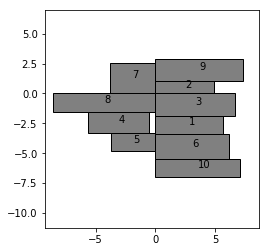

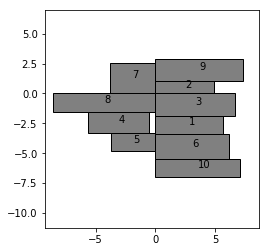

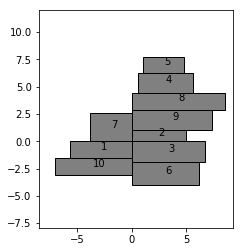

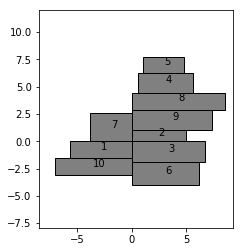

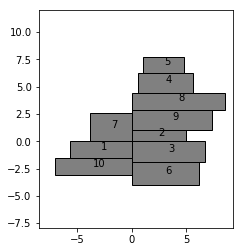

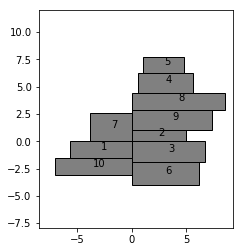

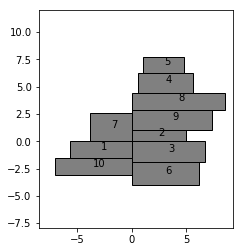

In [150]:
solution = algorithm1(alpha,nPop)

In [151]:
solution

([2, 3, 7, 1, 10, 9, 8, 6, 4, 5], 240.10876908325724)